In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.image as mpimg
import os
import glob
import random
import pathlib

In [3]:
for dirpath, dirnames, filenames in os.walk("C:\Users\arish\Downloads\archive (1)\Dataset"):
    print(f"{len(dirnames)} dirs and {len(filenames)} images in {dirpath}")

SyntaxError: unterminated string literal (detected at line 1) (29108706.py, line 1)

In [14]:
data_dir = "C:/Users/arish/Downloads/archive(1)/Dataset/"
path_dir = pathlib.Path("C:/Users/arish/Downloads/archive(1)/Dataset/") 
class_names = np.array(sorted([item.name for item in path_dir.glob('*')]))
print(class_names)
class_names

['Mild_Demented' 'Moderate_Demented' 'Non_Demented' 'Very_Mild_Demented']


array(['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
       'Very_Mild_Demented'], dtype='<U18')

In [15]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}")
    return img

Image shape: (128, 128)


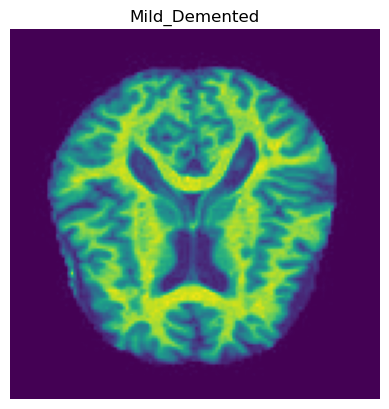

In [16]:
img = view_random_image(data_dir, class_names[0])

Image shape: (128, 128)


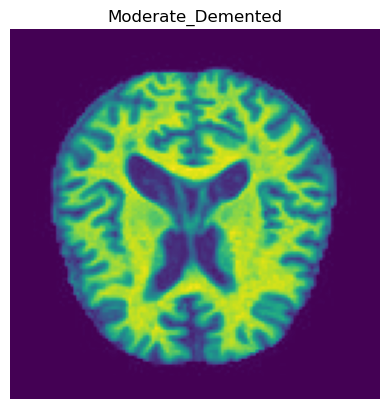

In [17]:
img = view_random_image(data_dir, class_names[1])

Image shape: (128, 128)


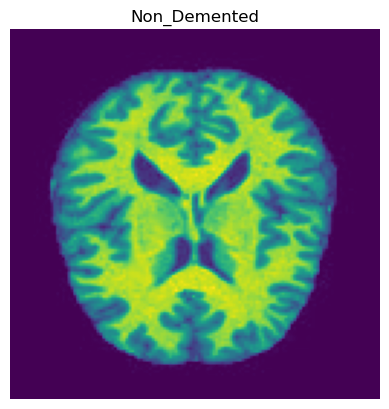

In [18]:
img = view_random_image(data_dir, class_names[2])

Image shape: (128, 128)


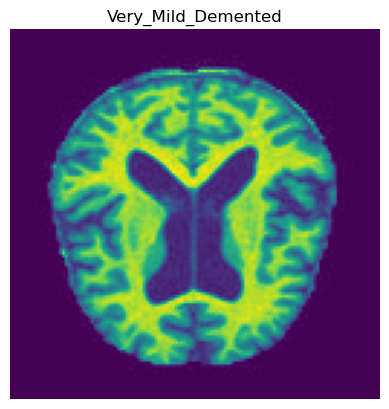

In [19]:
img = view_random_image(data_dir, class_names[3])

In [20]:
SEED = 0
BATCH_SIZE = 32
IMAGE_SIZE = (128, 128)
COLOR_MODE = 'grayscale'
VALIDATION_SPLIT = 0.1
TESTING_SPLIT = 0.3

tf.random.set_seed(SEED)
np.random.seed(SEED)

train_data = image_dataset_from_directory(
                data_dir,
                label_mode="categorical",
                validation_split = VALIDATION_SPLIT,
                color_mode=COLOR_MODE,
                image_size=IMAGE_SIZE,
                batch_size=BATCH_SIZE,
                subset = "training",
                seed = SEED)

valid_data = image_dataset_from_directory(
                data_dir,
                label_mode="categorical",
                validation_split=VALIDATION_SPLIT,
                color_mode=COLOR_MODE,
                image_size=IMAGE_SIZE,
                batch_size=BATCH_SIZE,
                subset = "validation",
                seed = SEED)

Found 6400 files belonging to 4 classes.
Using 5760 files for training.
Found 6400 files belonging to 4 classes.
Using 640 files for validation.


In [21]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D

In [22]:
base_model = EfficientNetB0(include_top=False)
base_model.trainable = True

inputs = Input(shape=(IMAGE_SIZE + (1,)), name = "Input_layer")
x = base_model(inputs)
x = GlobalAveragePooling2D()(x)
outputs = Dense(len(class_names), activation="softmax", name = "output_layer")(x)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 33s 2us/step


In [23]:
model = tf.keras.Model(inputs, outputs)

In [24]:
# model_arch1 = tf.keras.utils.plot_model(base_model, to_file='model1.png', show_shapes = True, show_layer_names=True)
# model_arch1

You must install pydot (`pip install pydot`) for `plot_model` to work.


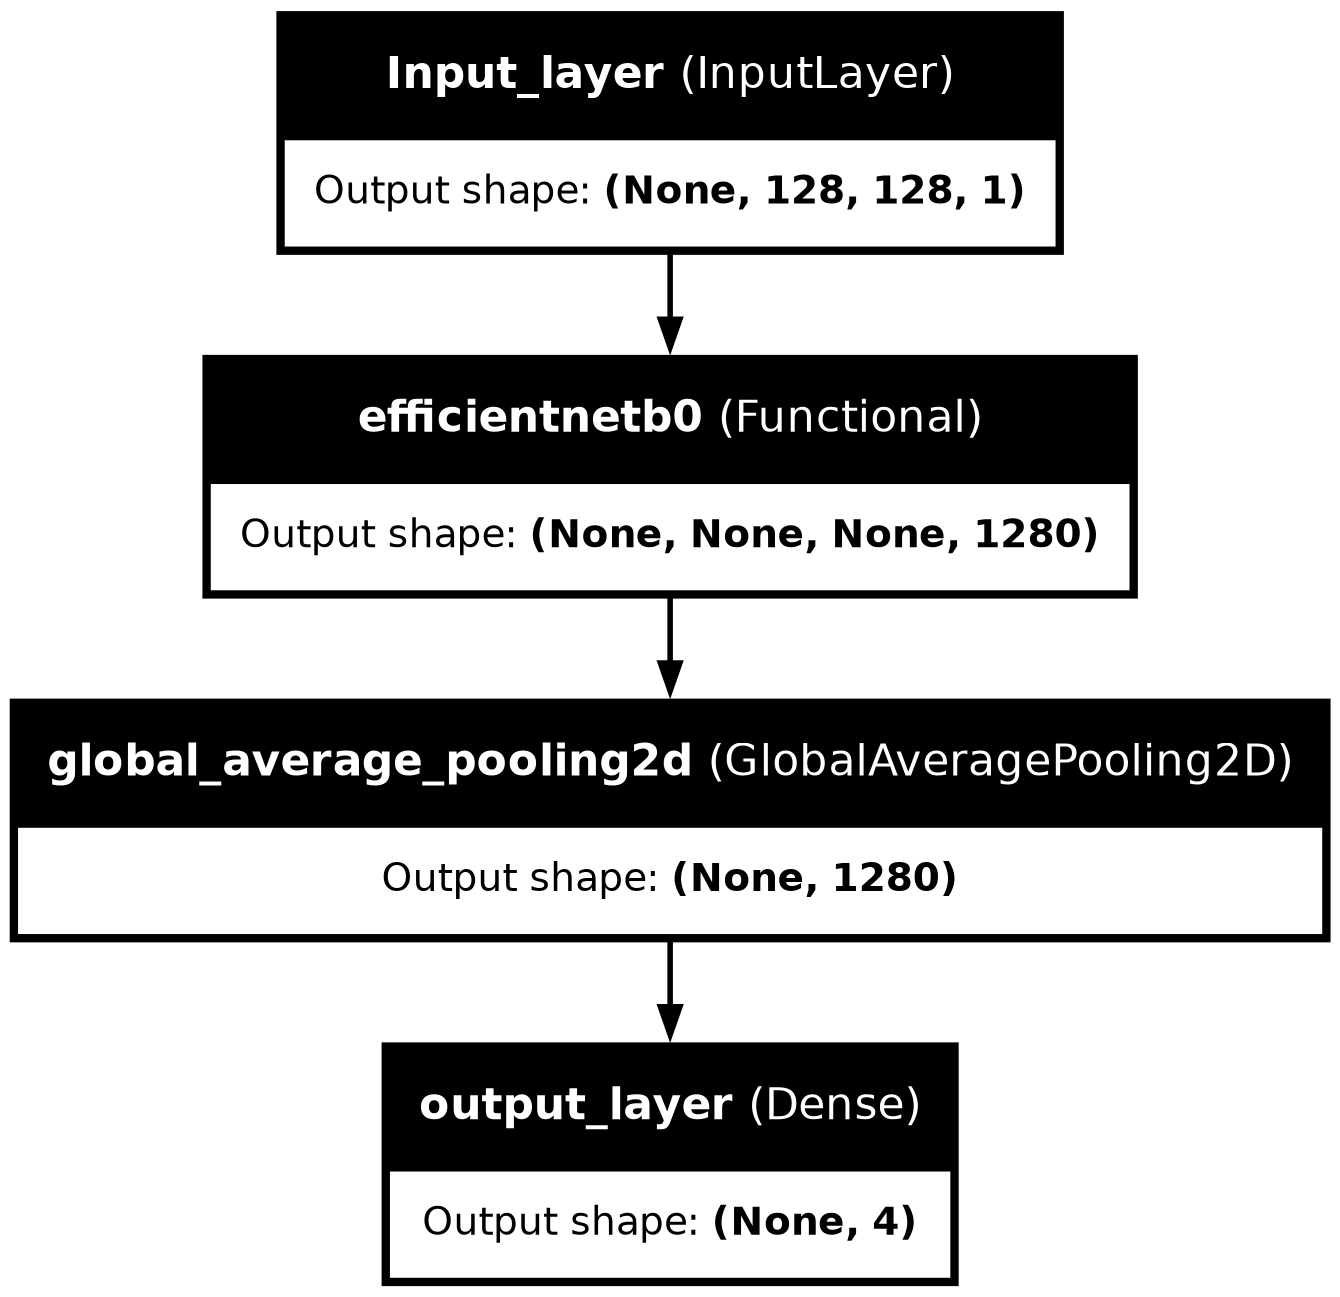

In [17]:
# model_arch = tf.keras.utils.plot_model(model, to_file='model.png', show_shapes = True, show_layer_names=True)
# model_arch

In [25]:
LR = 0.001

model.compile(loss =  "categorical_crossentropy",
             optimizer = tf.keras.optimizers.Adam(learning_rate=LR),
             metrics = ['accuracy'])

In [26]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input_layer (InputLayer)             │ (None, 128, 128, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 4, 4, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 4)                   │           5,124 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [27]:
EPOCHS = 50
history = model.fit(train_data,
         validation_data=valid_data,
         epochs=EPOCHS,
         verbose = 2)

Epoch 1/50
180/180 - 327s - 2s/step - accuracy: 0.6665 - loss: 0.7712 - val_accuracy: 0.5656 - val_loss: 1.0498
Epoch 2/50
180/180 - 216s - 1s/step - accuracy: 0.8642 - loss: 0.3502 - val_accuracy: 0.5859 - val_loss: 0.9719
Epoch 3/50
180/180 - 218s - 1s/step - accuracy: 0.9333 - loss: 0.1862 - val_accuracy: 0.7812 - val_loss: 0.5848
Epoch 4/50
180/180 - 219s - 1s/step - accuracy: 0.9592 - loss: 0.1216 - val_accuracy: 0.9422 - val_loss: 0.1803
Epoch 5/50
180/180 - 217s - 1s/step - accuracy: 0.9668 - loss: 0.0934 - val_accuracy: 0.9453 - val_loss: 0.1521
Epoch 6/50
180/180 - 220s - 1s/step - accuracy: 0.9731 - loss: 0.0714 - val_accuracy: 0.9516 - val_loss: 0.1288
Epoch 7/50
180/180 - 221s - 1s/step - accuracy: 0.9755 - loss: 0.0680 - val_accuracy: 0.9516 - val_loss: 0.1490
Epoch 8/50
180/180 - 226s - 1s/step - accuracy: 0.9845 - loss: 0.0461 - val_accuracy: 0.9547 - val_loss: 0.1402
Epoch 9/50
180/180 - 222s - 1s/step - accuracy: 0.9821 - loss: 0.0496 - val_accuracy: 0.9141 - val_loss:

Text(0.5, 1.0, 'Training and Validation Accuracy')

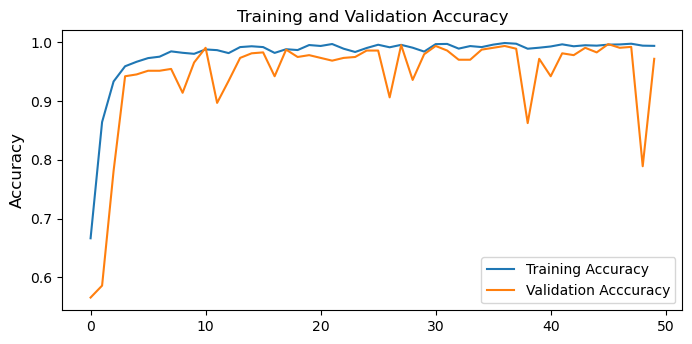

In [28]:
acc = history.history["accuracy"] # report of model
val_acc = history.history["val_accuracy"] # history of validation data

loss = history.history["loss"]        # Training loss
val_loss = history.history["val_loss"] # validation loss

plt.figure(figsize=(8,8))
plt.subplot(2,1,1) # 2 rows and 1 columns
#plotting respective accuracy
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc, label="Validation Acccuracy")

plt.legend()
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=12)

Text(0.5, 1.0, 'Training and Validation Losses')

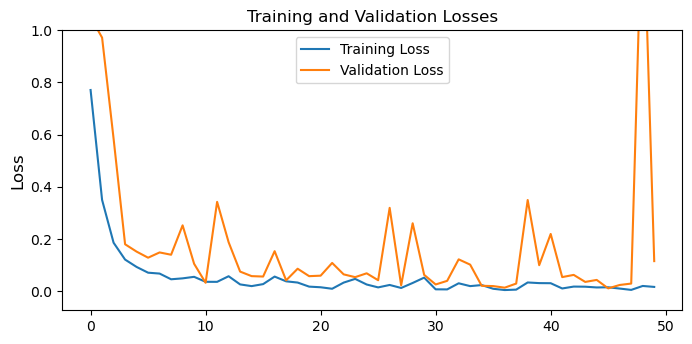

In [29]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
 
plt.plot(loss, label="Training Loss")      #Training loss
plt.plot(val_loss, label="Validation Loss") # Validation Loss

plt.legend()
plt.ylim([min(plt.ylim()),1])
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Losses", fontsize=12)

<Axes: >

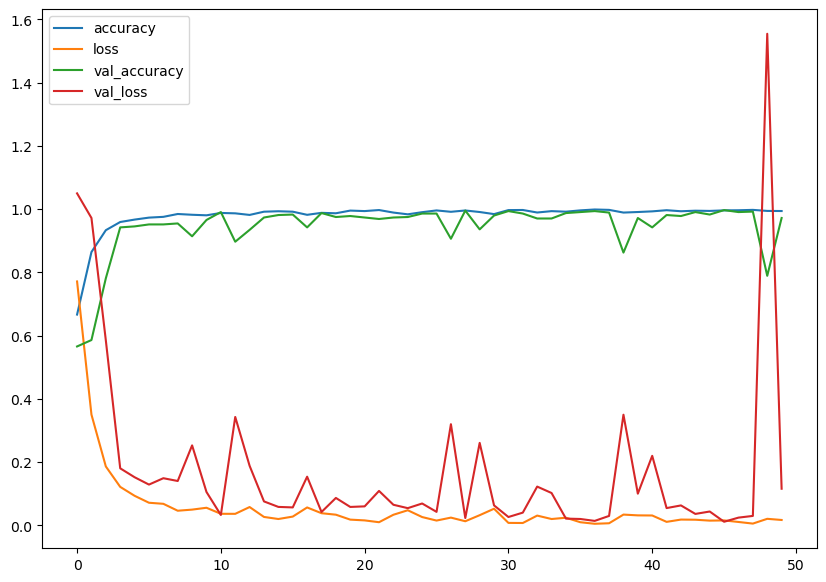

In [30]:
pd.DataFrame(history.history).plot(figsize=(10, 7))

In [35]:
tf.keras.models.save_model(model, 'alzheimer_model.keras')

In [36]:
from tensorflow.keras.models import load_model

In [40]:
loaded_model = load_model('alzheimer_model.keras')

C:\Users\arish\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 215 variables whereas the saved optimizer has 428 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [41]:
from tensorflow.keras.preprocessing import image

In [42]:
def predict_and_display(model, class_labels, img_path, true_class=None):
    img = image.load_img(img_path, target_size = IMAGE_SIZE)
    
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis = 0)
    predictions = loaded_model.predict(img_array)
    predicted_class = np.argmax(predictions)
    confidence_level = np.max(predictions)
    
    predicted_class_name = class_labels[predicted_class]
    
    plt.imshow(img)
    plt.axis("off")
    
    if(true_class):
        plt.title(f'Pred: {predicted_class_name}, True: {true_class}, conf: {confidence_level}')
    else:
        plt.title(f'Predicted_class: {prediceted_class_name}')
        
    plt.show()

In [43]:
class_names

array(['Mild_Demented', 'Moderate_Demented', 'Non_Demented',
       'Very_Mild_Demented'], dtype='<U18')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


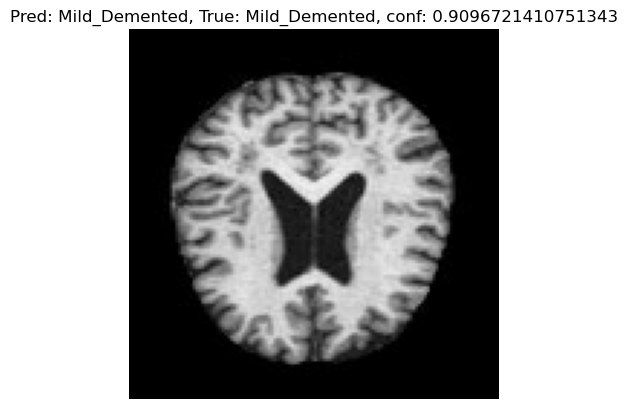

In [45]:
predict_and_display(loaded_model, class_names, "C:/Users/arish/Downloads/archive(1)/Dataset/Mild_Demented/mild_10.jpg", true_class="Mild_Demented")